## 1. Herramienta Tensor Flow

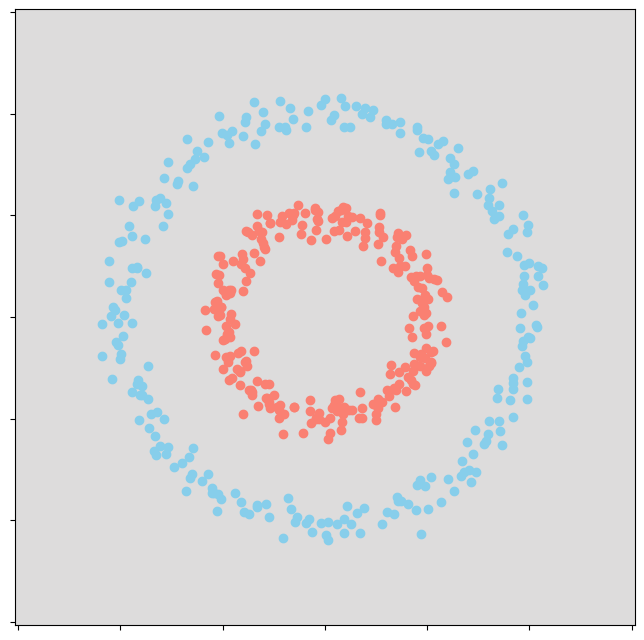

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos.

X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolucion del mapa de predicción.

res = 100

# Coordendadas del mapa de predicción.

_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# visualización del mapa de predicción.
plt.figure(figsize=(8, 8))

plt.pcolormesh(_x0,_x1, _pY, cmap="coolwarm", vmin=0, vmax=1)
# Visualización de la nube de datos.

plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

Instructions for updating:
non-resource variables are not supported in the long term


Step 0 / 1000 - Loss =  0.4591787 - Acc = 0.5
Step 25 / 1000 - Loss =  0.39381108 - Acc = 0.526
Step 50 / 1000 - Loss =  0.27704242 - Acc = 0.628
Step 75 / 1000 - Loss =  0.1921784 - Acc = 0.704
Step 100 / 1000 - Loss =  0.17429876 - Acc = 0.718
Step 125 / 1000 - Loss =  0.16312392 - Acc = 0.778
Step 150 / 1000 - Loss =  0.1535374 - Acc = 0.838
Step 175 / 1000 - Loss =  0.1452106 - Acc = 0.906
Step 200 / 1000 - Loss =  0.1375873 - Acc = 0.928
Step 225 / 1000 - Loss =  0.13064739 - Acc = 0.94
Step 250 / 1000 - Loss =  0.12434049 - Acc = 0.95
Step 275 / 1000 - Loss =  0.11838956 - Acc = 0.95
Step 300 / 1000 - Loss =  0.11273669 - Acc = 0.956
Step 325 / 1000 - Loss =  0.10739222 - Acc = 0.962
Step 350 / 1000 - Loss =  0.102284394 - Acc = 0.962
Step 375 / 1000 - Loss =  0.09738697 - Acc = 0.964
Step 400 / 1000 - Loss =  0.09263621 - Acc = 0.968
Step 425 / 1000 - Loss =  0.08798962 - Acc = 0.97
Step 450 / 1000 - Loss =  0.082984135 - Acc = 0.97
Step 475 / 1000 - Loss =  0.07783311 - Acc = 0

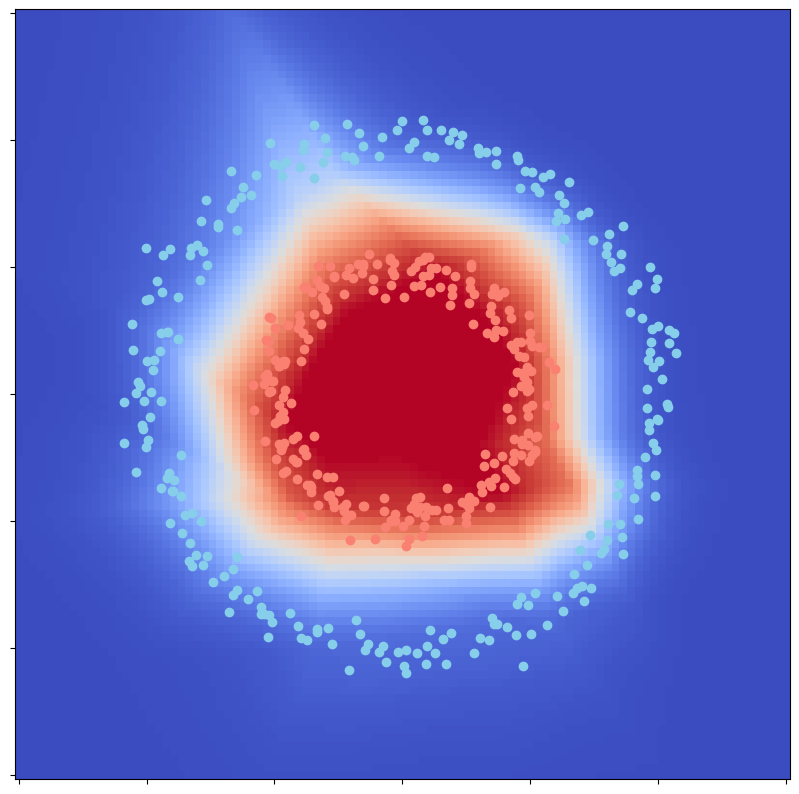

In [2]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

Ir = 0.01 # learning rate

nn = [2, 16, 8, 1] # nimero de neuronas por capa.

# Capa 1

W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2

W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3

W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de v.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:,0]

# Evaluación de las predicciones
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Número de ciclos de entrenamiento.
iPY = [] # Aqui guardaremos la evolucién de las predicción, para la animación.

with tf.Session() as sess:
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
    # Evaluamos al optimizador, a la función de coste y al tensor de salida py.
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    # Cada 25 iteraciones, impriminos métricas.
    if step % 25 == 0:
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      # Iapresion de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción px.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))
      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)

#---- CÓDIGO ANIMACIÓN ----- #
ims = []
fig = plt. figure(figsize=(10, 10))
print("--- Generando animación ---")
for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  # visualizacién de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
  # plt.title("Resultado Clasificación)
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML (ani.to_html5_video())

## 2. Herramienta Keras

In [7]:
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD as LegacySGD
from IPython.core.display import display, HTML

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # nimero de neuronas por capa.

# Creamos el objeto que contendra a nuestra red neuronal, como

# secuencia de capas.

model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos 1a capa 2
l2 = model .add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos 1a capa 3

l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la funcidn de coste y el optimizador.
model.compile(loss='mse', optimizer = LegacySGD(learning_rate=0.05), metrics=['acc'])
# Y entrenamos al modelo. Los callbacks

model.fit(X, Y, epochs=100)

Train on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 201us/sample - loss: 0.2277 - acc: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 59us/sample - loss: 0.2242 - acc: 0.5120
Epoch 3/100
500/500 [==============================] - 0s 60us/sample - loss: 0.2216 - acc: 0.5600
Epoch 4/100
500/500 [==============================] - 0s 53us/sample - loss: 0.2195 - acc: 0.6000
Epoch 5/100
500/500 [==============================] - 0s 60us/sample - loss: 0.2172 - acc: 0.6460
Epoch 6/100
500/500 [==============================] - 0s 54us/sample - loss: 0.2152 - acc: 0.6720
Epoch 7/100
500/500 [==============================] - 0s 56us/sample - loss: 0.2132 - acc: 0.7740
Epoch 8/100
500/500 [==============================] - 0s 49us/sample - loss: 0.2111 - acc: 0.8100
Epoch 9/100
500/500 [==============================] - 0s 51us/sample - loss: 0.2089 - acc: 0.8580
Epoch 10/100
500/500 [==============================] - 0s 59us/sample - loss: 0.2067 -

## 3. Herramienta scikit learn

In [16]:
import sklearn as sk
import sklearn.neural_network
from IPython.core.display import display, HTML

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por Capa.

# Creamos el objeto del modelo de red neuronal multicapa.

clf = sk.neural_network.MLPRegressor(solver='sgd',learning_rate_init=lr,hidden_layer_sizes=tuple(nn[1:]),verbose=True,n_iter_no_change=1000,batch_size=64)

# Y lo entrenamos con nuestro datos.

clf.fit(X, Y)

Iteration 1, loss = 0.14717385
Iteration 2, loss = 0.13185333
Iteration 3, loss = 0.12420932
Iteration 4, loss = 0.12382257
Iteration 5, loss = 0.12395758
Iteration 6, loss = 0.12371588
Iteration 7, loss = 0.12325817
Iteration 8, loss = 0.12303743
Iteration 9, loss = 0.12281557
Iteration 10, loss = 0.12256644
Iteration 11, loss = 0.12231790
Iteration 12, loss = 0.12200035
Iteration 13, loss = 0.12165430
Iteration 14, loss = 0.12124147
Iteration 15, loss = 0.12072283
Iteration 16, loss = 0.12024434
Iteration 17, loss = 0.11978003
Iteration 18, loss = 0.11911829
Iteration 19, loss = 0.11838903
Iteration 20, loss = 0.11784278
Iteration 21, loss = 0.11701418
Iteration 22, loss = 0.11625711
Iteration 23, loss = 0.11559249
Iteration 24, loss = 0.11474389
Iteration 25, loss = 0.11406354
Iteration 26, loss = 0.11341084
Iteration 27, loss = 0.11290211
Iteration 28, loss = 0.11210455
Iteration 29, loss = 0.11181954
Iteration 30, loss = 0.11097756
Iteration 31, loss = 0.11050999
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)